<a href="https://colab.research.google.com/github/OfriA/AppliedProject52056/blob/main/data/DataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
url = "https://github.com/OfriA/AppliedProject52056/raw/refs/heads/main/data/ER_data.xlsx"
data = pd.read_excel(url)

data.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,pba17,pba18,pba19,pba20,pba21,pba22,pba23,publication,publication_1_TEXT,notes
0,2023-11-10 05:03:59,2023-11-10 05:18:24,0,77.137.72.8,100,864,1,2023-11-10 05:18:24.970,R_2zx6JDdyuRWIFe7,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN
1,2023-11-11 11:48:18,2023-11-11 12:05:28,0,89.139.151.60,100,1030,1,2023-11-11 12:05:29.243,R_87VewwKW25MdOWR,NaN,...,0.0,0.0,0.0,0.0,2.0,1.0,0.0,NaN,NaN,אספקט נוסף שתורם ללחץ משפחתי או כך שאנו מארחים...
2,2023-11-11 12:15:06,2023-11-11 12:28:18,0,77.137.65.231,100,791,1,2023-11-11 12:28:18.984,R_2UXkBlYFVZKykUc,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,לא
3,2023-11-11 12:32:33,2023-11-11 12:59:45,0,2.52.150.227,100,1631,1,2023-11-11 12:59:45.938,R_3NJoeQvJTS5YS4s,NaN,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN
4,2023-11-11 13:21:15,2023-11-11 13:51:44,0,77.137.77.167,100,1829,1,2023-11-11 13:51:45.899,R_2wHVGst8nWwQV1c,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [14]:
print(data.columns)

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName',
       ...
       'pba17', 'pba18', 'pba19', 'pba20', 'pba21', 'pba22', 'pba23',
       'publication', 'publication_1_TEXT', 'notes'],
      dtype='object', length=344)


In [16]:
CBCL_features = data.columns[240:283].to_list()
self_exposure_features = ['SelfExposure_1', 'SelfExposure_2', 'SelfExposure_3', 'SelfExposure_4', 'SelfExposure_5', 'SelfExposure_6']
other_exposure_features = ['OtherExposure_6', 'OtherExposure_7', 'OtherExposure_8', 'OtherExposure_9', 'OtherExposure_10', 'OtherExposure_11', 'OtherExposure_12']

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Columns: 344 entries, StartDate to notes
dtypes: datetime64[ns](3), float64(299), int64(13), object(29)
memory usage: 1.7+ MB


In [18]:
self_exposure_features = ['SelfExposure_1', 'SelfExposure_2', 'SelfExposure_3', 'SelfExposure_4', 'SelfExposure_5', 'SelfExposure_6']
other_exposure_features = ['OtherExposure_6', 'OtherExposure_7', 'OtherExposure_8', 'OtherExposure_9', 'OtherExposure_10', 'OtherExposure_11', 'OtherExposure_12']

data['self_exposure_score'] = np.sum(data[self_exposure_features], axis=1)
data['other_exposure_score'] = np.sum(data[other_exposure_features], axis=1)
data['war_exposure_score'] = np.sum(data[['self_exposure_score', 'other_exposure_score']], axis=1)

In [19]:

CBCL_D_features = CBCL_features[0:13]
CBCL_A_features = CBCL_features[13:31]
CBCL_S_features = CBCL_features[31:]


data['CBCL_D_score'] = np.sum(data[CBCL_D_features], axis=1)
data['CBCL_A_score'] = np.sum(data[CBCL_D_features], axis=1)
data['CBCL_S_score'] = np.sum(data[CBCL_D_features], axis=1)
data['CBCL_score'] = np.sum(data[['CBCL_D_score', 'CBCL_A_score', 'CBCL_S_score']], axis=1)

In [20]:
data

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,publication,publication_1_TEXT,notes,self_exposure_score,other_exposure_score,war_exposure_score,CBCL_D_score,CBCL_A_score,CBCL_S_score,CBCL_score
0,2023-11-10 05:03:59,2023-11-10 05:18:24,0,77.137.72.8,100,864,1,2023-11-10 05:18:24.970,R_2zx6JDdyuRWIFe7,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-11-11 11:48:18,2023-11-11 12:05:28,0,89.139.151.60,100,1030,1,2023-11-11 12:05:29.243,R_87VewwKW25MdOWR,NaN,...,NaN,NaN,אספקט נוסף שתורם ללחץ משפחתי או כך שאנו מארחים...,0.0,2.0,2.0,4.0,4.0,4.0,12.0
2,2023-11-11 12:15:06,2023-11-11 12:28:18,0,77.137.65.231,100,791,1,2023-11-11 12:28:18.984,R_2UXkBlYFVZKykUc,NaN,...,NaN,NaN,לא,0.0,4.0,4.0,0.0,0.0,0.0,0.0
3,2023-11-11 12:32:33,2023-11-11 12:59:45,0,2.52.150.227,100,1631,1,2023-11-11 12:59:45.938,R_3NJoeQvJTS5YS4s,NaN,...,NaN,NaN,NaN,0.0,1.0,1.0,3.0,3.0,3.0,9.0
4,2023-11-11 13:21:15,2023-11-11 13:51:44,0,77.137.77.167,100,1829,1,2023-11-11 13:51:45.899,R_2wHVGst8nWwQV1c,NaN,...,NaN,NaN,NaN,1.0,6.0,7.0,10.0,10.0,10.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,2023-11-26 22:02:41,2023-11-26 22:13:08,0,31.168.96.254,97,627,0,2023-12-03 22:13:11.524,R_21cuNVR5ybguwd6,NaN,...,2.0,NaN,NaN,1.0,0.0,1.0,7.0,7.0,7.0,21.0
655,2023-11-26 23:35:51,2023-11-26 23:51:01,0,147.235.195.148,97,909,0,2023-12-03 23:51:05.986,R_1M08TyCvxduAAvg,NaN,...,2.0,NaN,NaN,0.0,2.0,2.0,0.0,0.0,0.0,0.0
656,2023-11-26 23:58:01,2023-11-27 00:34:06,0,147.237.70.155,97,2164,0,2023-12-04 00:34:07.561,R_3QQX9D3MBDczyU3,NaN,...,2.0,NaN,לא,0.0,6.0,6.0,0.0,0.0,0.0,0.0
657,2023-11-27 00:02:48,2023-11-27 00:50:18,0,147.237.70.155,97,2849,0,2023-12-04 00:50:22.529,R_3GuOsxnKd4Jm6KE,NaN,...,2.0,NaN,"לא, תודה.",1.0,2.0,3.0,0.0,0.0,0.0,0.0


In [21]:
data.shape

(659, 351)

In [22]:
data['Event_length'] = data['Event'].str.len()
data['EER_text_length'] = data['EER_text'].str.len()

data['EER_text_length'] = data['EER_text_length'].fillna(0)

In [23]:
data = data[np.sum(data[self_exposure_features + other_exposure_features + CBCL_features].isna(), axis=1) == 0]

In [24]:
print(f"CBCL mean: {data['CBCL_score'].mean():.5}, CBCL SD: {data['CBCL_score'].std():.5}")

CBCL mean: 19.612, CBCL SD: 14.979


In [25]:
!pip install corner

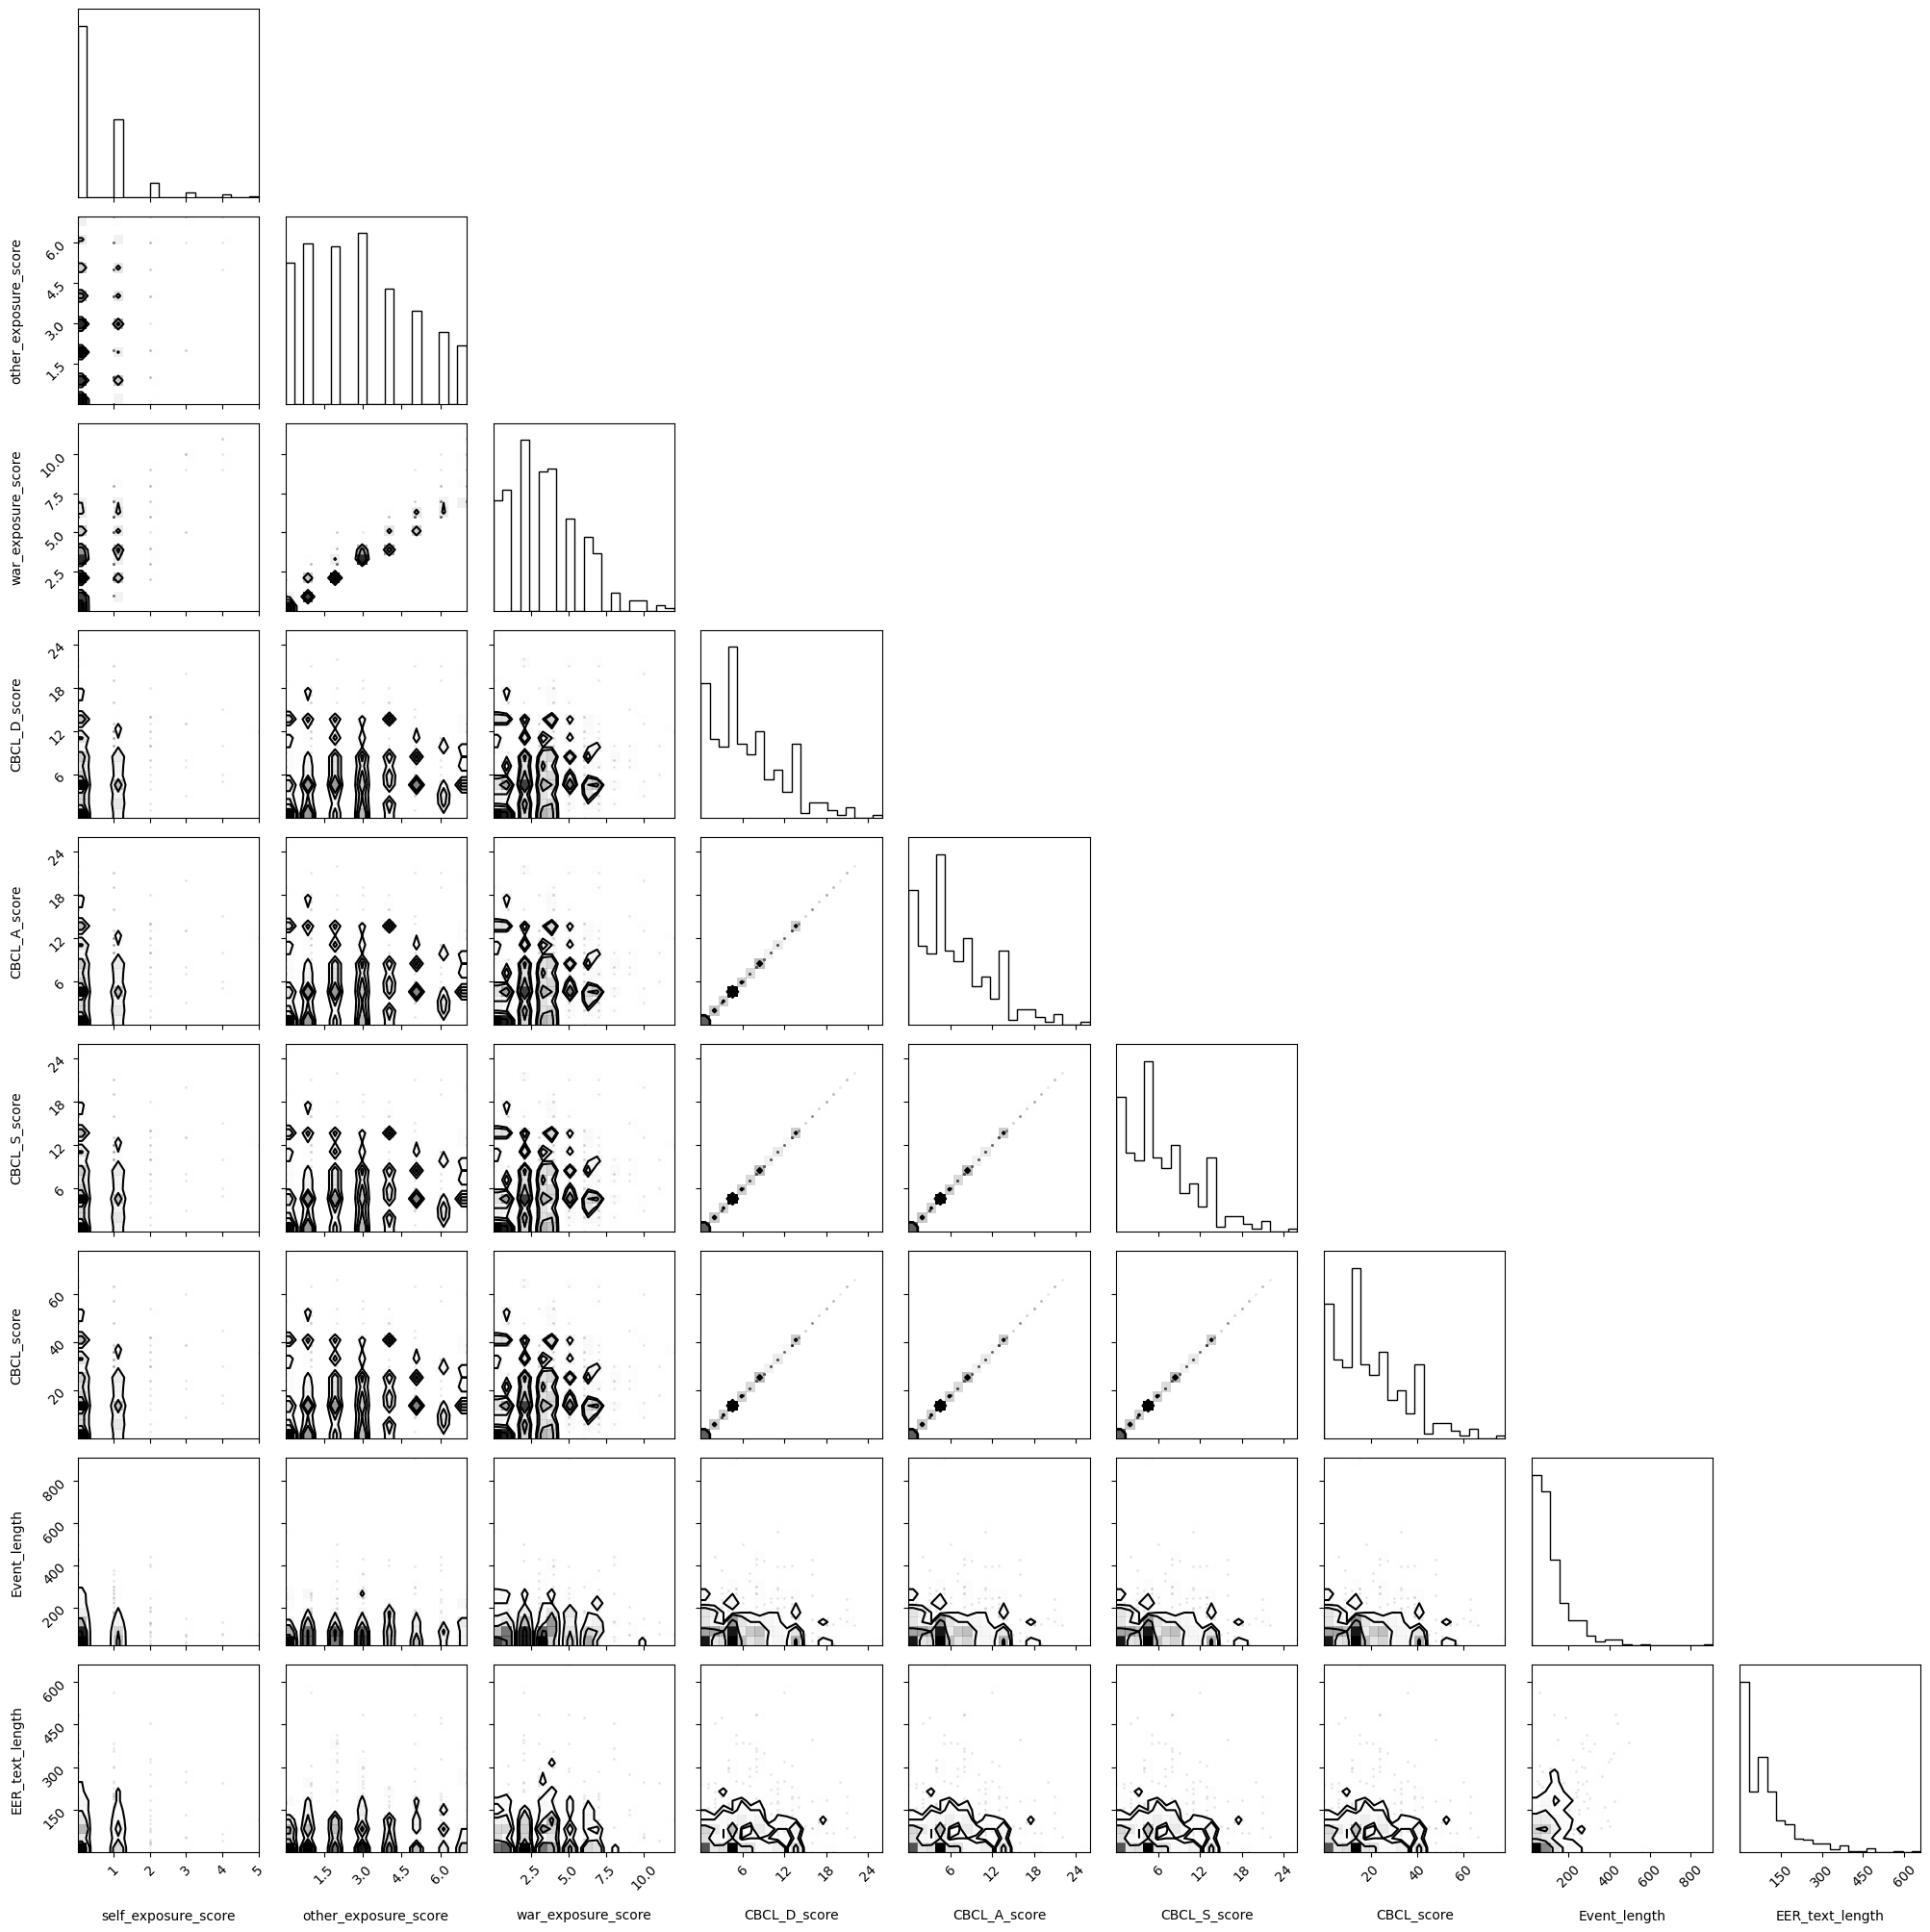

In [28]:
import corner


# Generate corner plot using ArviZ
labels = data[['self_exposure_score', 'other_exposure_score', 'war_exposure_score','CBCL_D_score', 'CBCL_A_score', 'CBCL_S_score', 'CBCL_score', 'Event_length', 'EER_text_length']].columns.tolist()  # Get column names as labels
figure = corner.corner(data[['self_exposure_score', 'other_exposure_score', 'war_exposure_score','CBCL_D_score', 'CBCL_A_score', 'CBCL_S_score', 'CBCL_score', 'Event_length', 'EER_text_length']].values, labels=labels, quiet = True)
plt.tight_layout()
plt.show()

In [30]:
import seaborn as sns

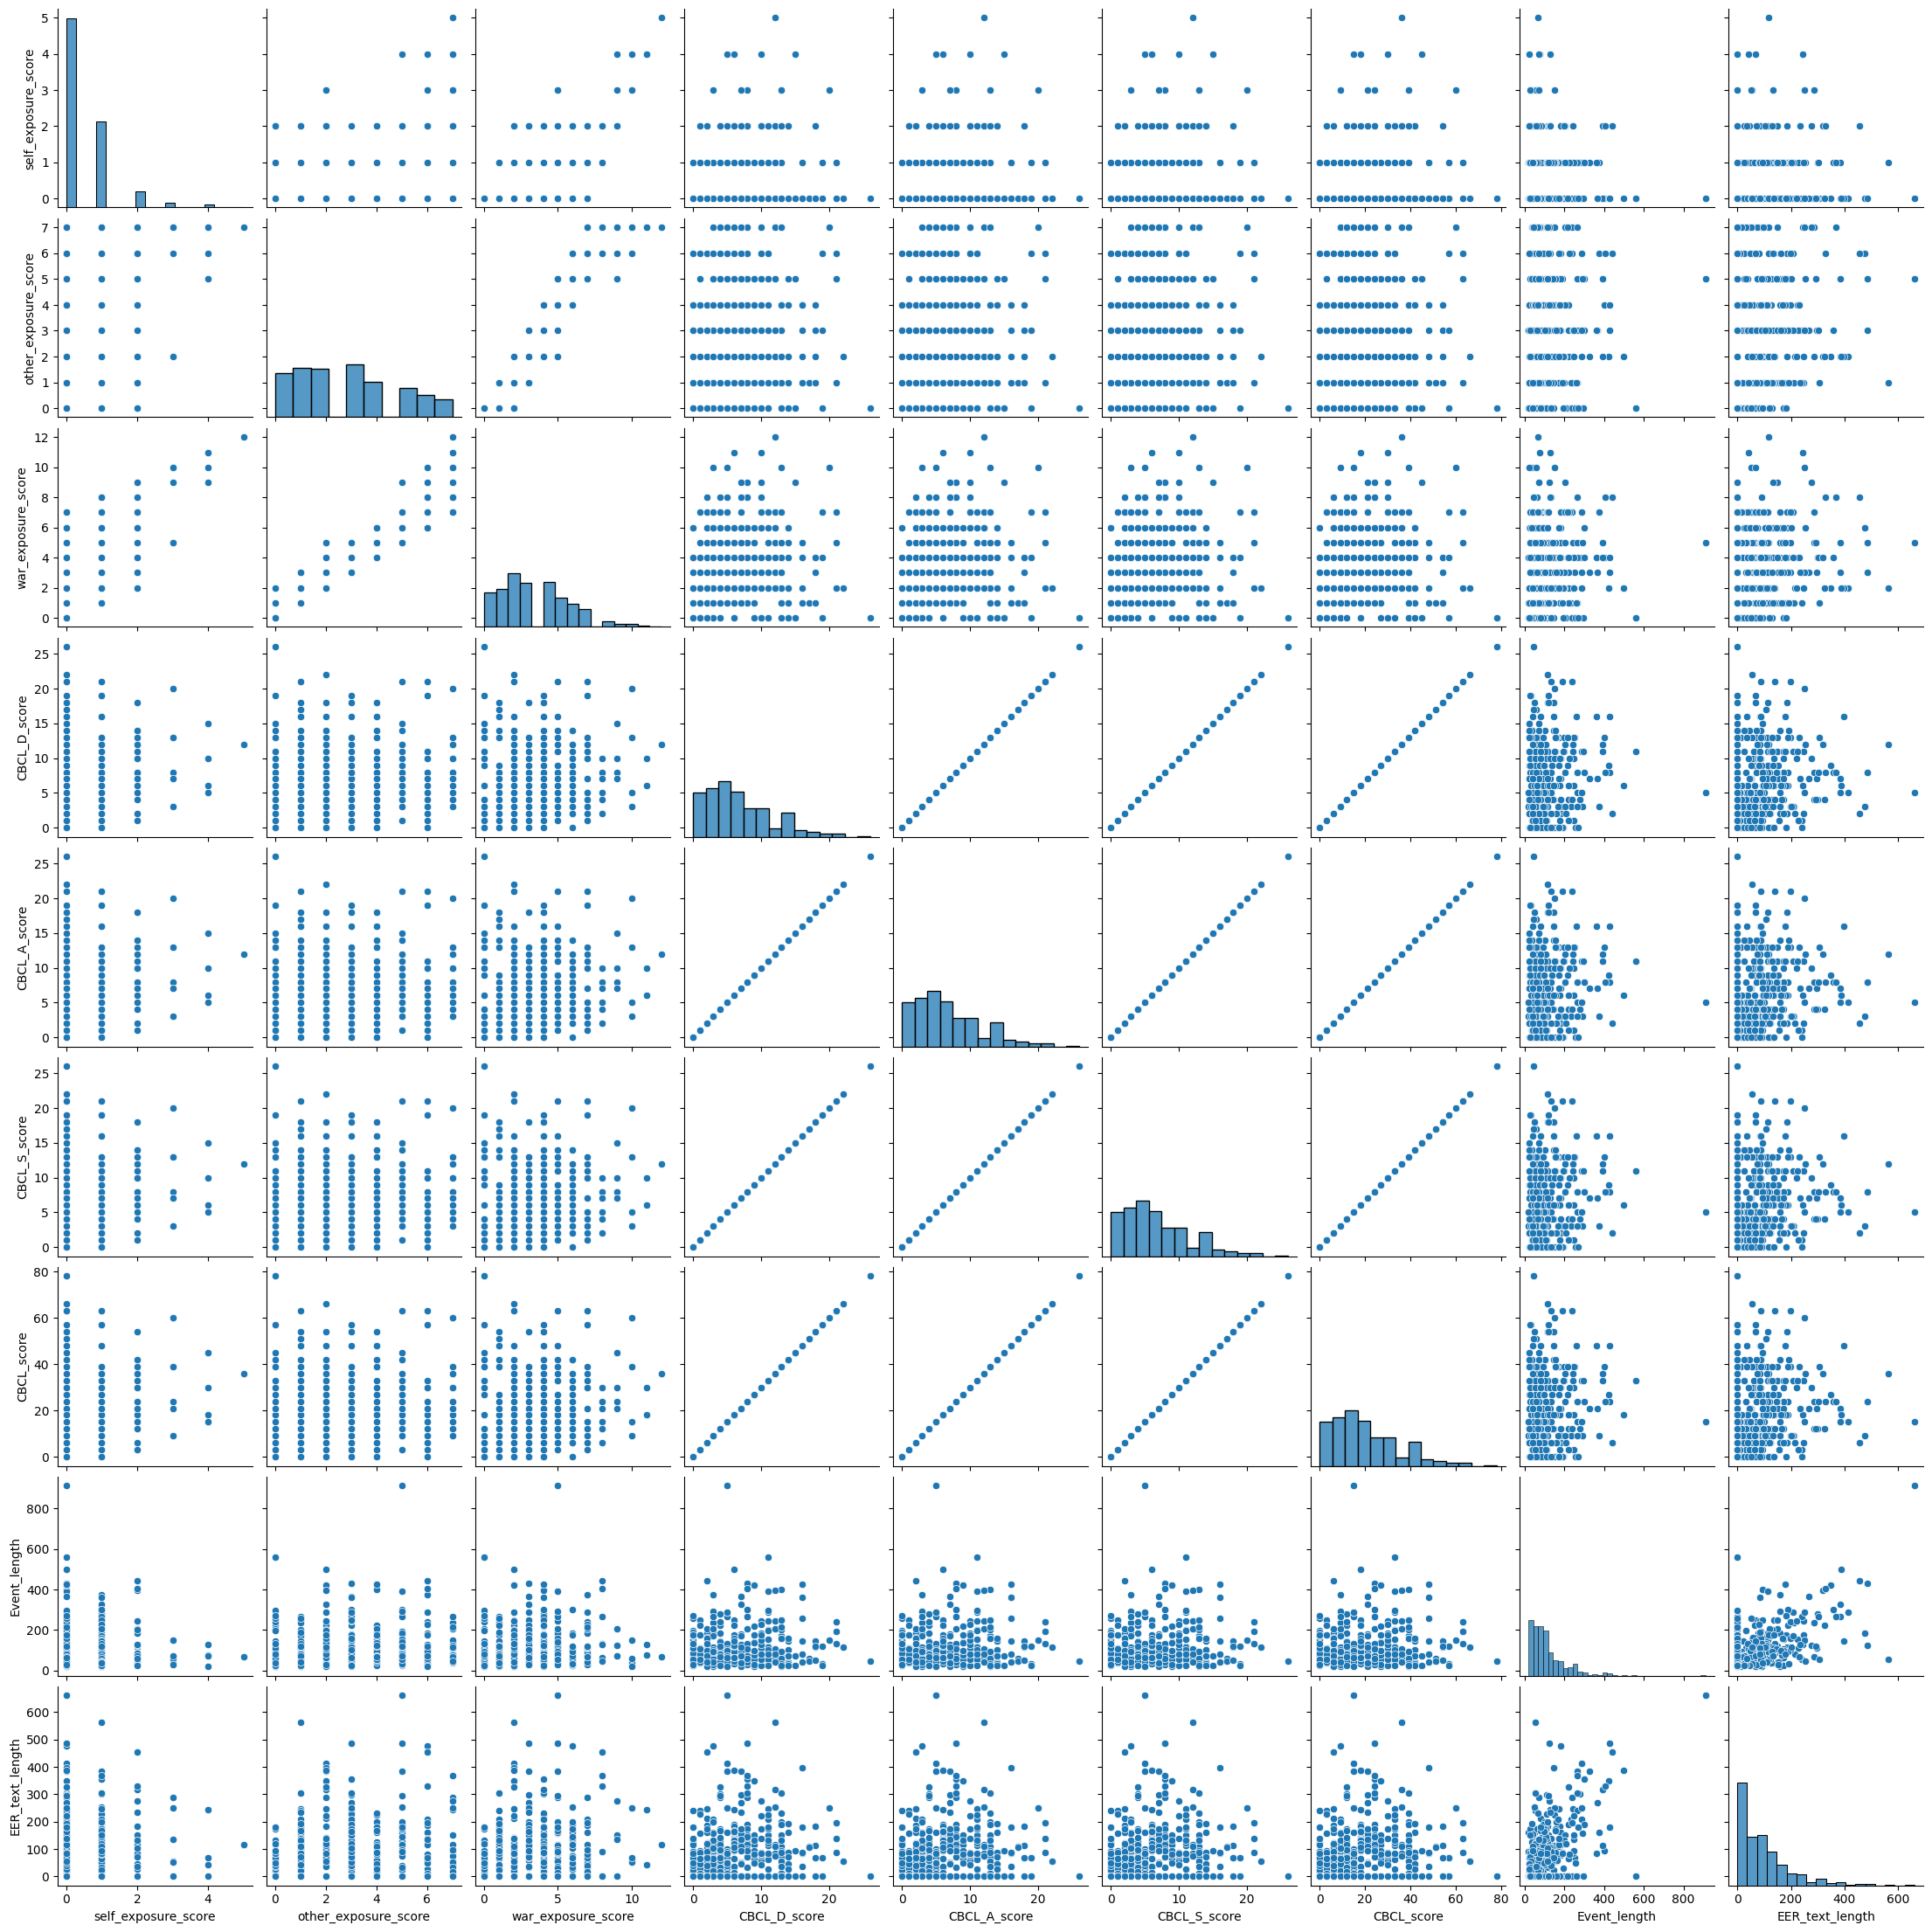

In [32]:
sns.pairplot(data[['self_exposure_score', 'other_exposure_score', 'war_exposure_score','CBCL_D_score', 'CBCL_A_score', 'CBCL_S_score', 'CBCL_score', 'Event_length', 'EER_text_length']])

In [37]:
data[['self_exposure_score', 'other_exposure_score', 'war_exposure_score','CBCL_D_score', 'CBCL_A_score', 'CBCL_S_score', 'CBCL_score', 'Event_length', 'EER_text_length']].corr()

,self_exposure_score,other_exposure_score,war_exposure_score,CBCL_D_score,CBCL_A_score,CBCL_S_score,CBCL_score,Event_length,EER_text_length
self_exposure_score,1.000000,0.273326,0.566582,0.155091,0.155091,0.155091,0.155091,-0.032834,0.081228
other_exposure_score,0.273326,1.000000,0.947490,0.097494,0.097494,0.097494,0.097494,0.117413,0.131980
war_exposure_score,0.566582,0.947490,1.000000,0.135075,0.135075,0.135075,0.135075,0.089663,0.140061
CBCL_D_score,0.155091,0.097494,0.135075,1.000000,1.000000,1.000000,1.000000,0.078094,0.103687
CBCL_A_score,0.155091,0.097494,0.135075,1.000000,1.000000,1.000000,1.000000,0.078094,0.103687
CBCL_S_score,0.155091,0.097494,0.135075,1.000000,1.000000,1.000000,1.000000,0.078094,0.103687
CBCL_score,0.155091,0.097494,0.135075,1.000000,1.000000,1.000000,1.000000,0.078094,0.103687
Event_length,-0.032834,0.117413,0.089663,0.078094,0.078094,0.078094,0.078094,1.000000,0.510122
EER_text_length,0.081228,0.131980,0.140061,0.103687,0.103687,0.103687,0.103687,0.510122,1.000000


In [ ]:
data2 =